In [564]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('camera_image.jpg')
print(image.shape)
ori = image.copy()


(2088, 4640, 3)


In [567]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [569]:
gray

array([[122, 122, 122, ...,  43,  39,  35],
       [122, 122, 122, ...,  42,  37,  34],
       [122, 122, 122, ...,  39,  36,  34],
       ...,
       [150, 150, 150, ..., 162, 162, 162],
       [150, 150, 150, ..., 162, 162, 162],
       [150, 150, 150, ..., 162, 162, 162]], dtype=uint8)

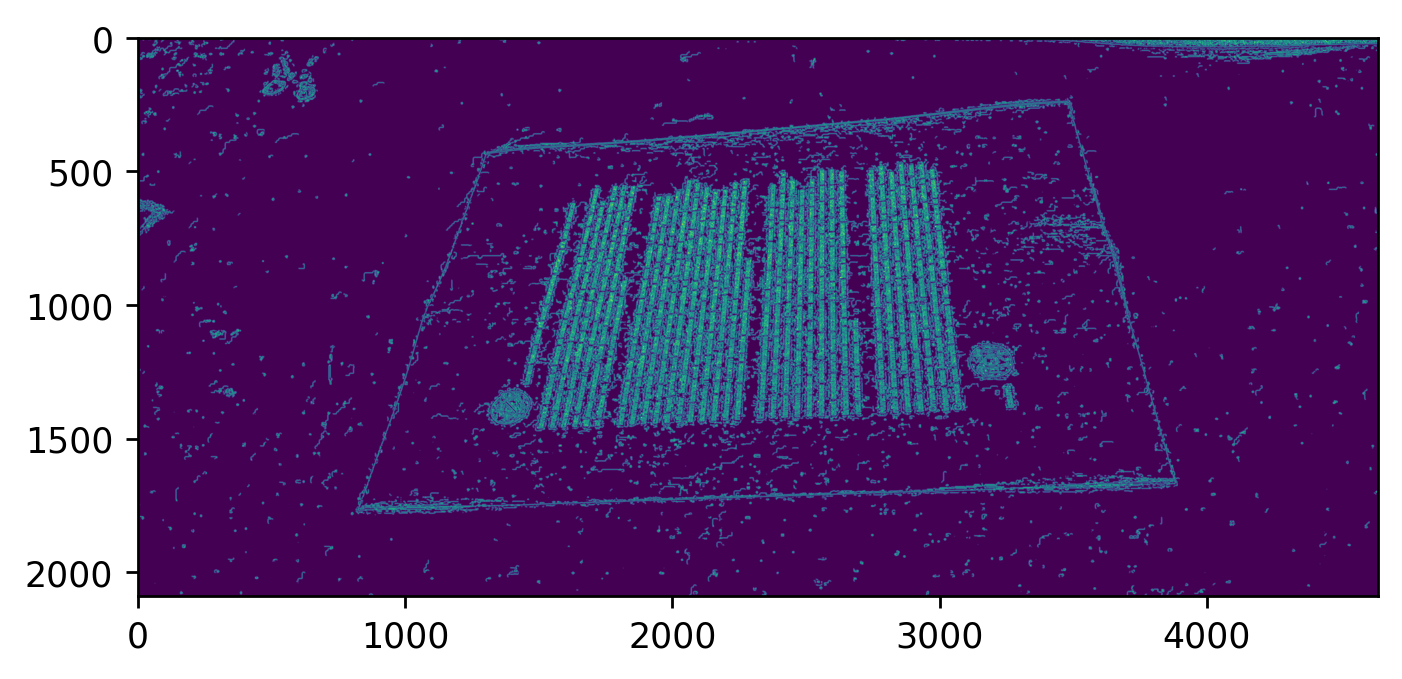

In [157]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
edged = cv2.Canny(gray, 0, 6)
edged = cv2.GaussianBlur(edged, (7,7), 0)
plt.figure(dpi=250)
plt.imshow(edged)
plt.show()
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]


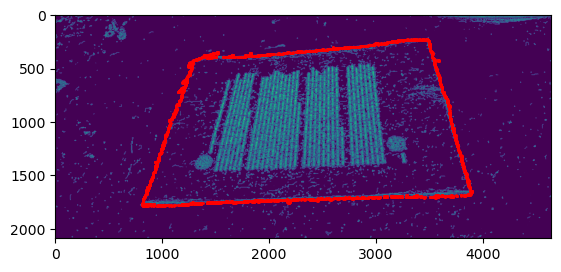

In [161]:
which_contour = 0
contour_x = cnts[which_contour][:,0,0]
contour_y = cnts[which_contour][:,0,1]


plt.imshow(edged)
plt.scatter(contour_x,contour_y, s= 1, color="r")





In [183]:
rect = cv2.approxPolyDP(cnts[which_contour], 60, True).copy().reshape(-1, 2)

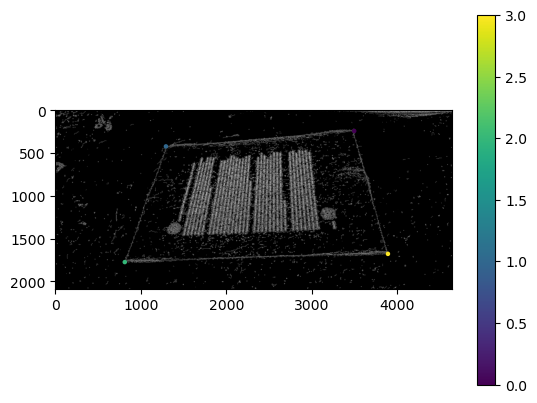

In [193]:
plt.imshow(edged, cmap="gray")

contour_x = rect[:,0]
contour_y = rect[:,1]


plt.scatter(contour_x, contour_y, s= 5, c=np.arange(rect.shape[0]))
plt.colorbar()

In [185]:
rect.shape

(4, 2)

In [517]:
W = 210*4
H = 297*4

x1 = 0
y1 = 0

x2 = W
y2 = 0

x3 = 0
y3 = H

x4 = W
y4 = H

In [518]:
X1 = rect[3,0]
Y1 = rect[3,1]

X2 = rect[0,0]
Y2 = rect[0,1]

X3 = rect[2,0]
Y3 = rect[2,1]

X4 = rect[1,0]
Y4 = rect[1,1]

In [519]:
x_all = np.array([
    [x1, y1],
    [x2, y2],
    [x3, y3],
    [x4, y4],
]).T

X_all = np.array([
    [X1, Y1],
    [X2, Y2],
    [X3, Y3],
    [X4, Y4],
]).T

In [520]:
x_all_plusone = np.vstack([x_all, np.ones((1, x_all.shape[1]))])
X_all_plusone = np.vstack([X_all, np.ones((1, X_all.shape[1]))])

# SVD approach (under development)

In [494]:
# https://www.youtube.com/watch?v=54Qtu3S9HJU
A = np.array([
    [-x1, -y1, -1, 0, 0, 0, x1*X1, y1*X1, X1],
    [0, 0, 0, -x1, -y1, -1, x1*Y1, y1*Y1, Y1],
    [-x2, -y2, -1, 0, 0, 0, x2*X2, y2*X2, X2],
    [0, 0, 0, -x2, -y2, -1, x2*Y2, y2*Y2, Y2],
    [-x3, -y3, -1, 0, 0, 0, x3*X3, y3*X3, X3],
    [0, 0, 0, -x3, -y3, -1, x3*Y3, y3*Y3, Y3],
    [-x4, -y4, -1, 0, 0, 0, x4*X4, y4*X4, X4],
    [0, 0, 0, -x4, -y4, -1, x4*Y4, y4*Y4, Y4]

])

In [348]:
A.shape

(8, 9)

In [346]:
U, S, Vh = np.linalg.svd(A)
Vh

array([[ 3.21819496e-04,  2.37814008e-04,  1.71140802e-06,
         5.55118176e-05,  1.75820034e-04,  6.54515279e-07,
        -8.58493550e-01, -5.12800518e-01, -4.92539933e-03],
       [ 9.08068709e-05, -2.74882685e-04, -4.97810745e-08,
        -1.75928518e-05, -3.55056066e-04, -1.13535425e-06,
        -5.12806027e-01,  8.58504359e-01, -1.85465082e-04],
       [ 5.17543557e-03,  8.61148976e-03, -1.91804501e-04,
         2.57234130e-03, -4.26135755e-03, -1.03385052e-04,
        -4.32086547e-03, -2.36444390e-03,  9.99924984e-01],
       [-1.77446764e-01, -5.86793338e-01, -1.95962140e-03,
         4.00085672e-01,  6.81208571e-01,  2.67490003e-03,
        -1.34049583e-04,  4.24417961e-05,  7.84525585e-03],
       [-1.06296360e-02, -6.11333804e-01, -1.81481360e-03,
        -7.88476368e-01, -6.63634284e-02, -2.36950170e-03,
        -1.01012474e-04, -2.97035916e-04,  7.06373787e-03],
       [ 2.25768780e-01, -5.30813380e-01, -2.22486155e-03,
         4.65027129e-01, -6.71563714e-01,  3.464393

In [330]:
Vh.shape

(9, 9)

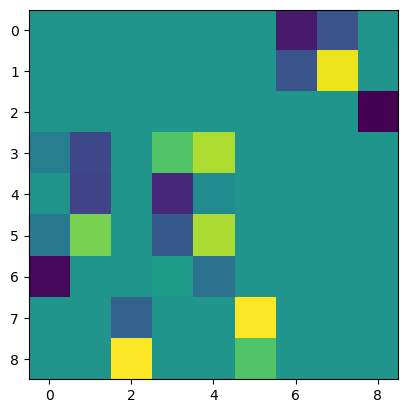

In [331]:
plt.imshow(Vh)

In [332]:
A@Vh[-1,:]

array([ 8.88178420e-16,  6.01152461e-12,  1.87655308e-11, -6.62303545e-12,
       -1.79595228e-11,  1.08278941e-11,  3.51293994e-12,  1.52746704e-11])

In [334]:
Vh[-1,:]

array([ 1.22034868e-03, -2.36920229e-03,  9.18296064e-01, -1.50118259e-03,
        2.43143308e-04,  3.95882391e-01,  4.75758907e-07,  9.40999453e-08,
        2.36065826e-04])

In [335]:
H = np.reshape(Vh[-1,:], (3, 3))

In [338]:
x_all_plusone

array([[  0., 210.,   0., 210.],
       [  0.,   0., 297., 297.],
       [  1.,   1.,   1.,   1.]])

In [342]:
X_all_estimated = H@x_all_plusone

In [343]:
X_all_estimated.shape

(3, 4)

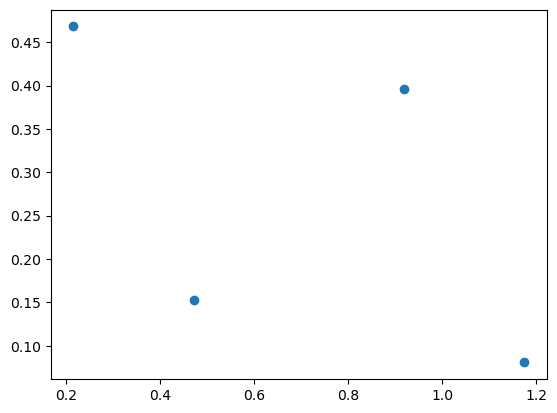

In [344]:
plt.scatter(X_all_estimated[0,:],X_all_estimated[1,:])

# Least square approach

In [521]:
A = np.array([
    [x1, y1, 1, 0, 0, 0, 0, 0, -X1, 0, 0, 0],
    [0, 0, 0, x1, y1, 1, 0, 0, -Y1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, x1, y1, -1, 0, 0, 0],
    [x2, y2, 1, 0, 0, 0, 0, 0, 0, -X2, 0, 0],
    [0, 0, 0, x2, y2, 1, 0, 0, 0, -Y2, 0, 0],
    [0, 0, 0, 0, 0, 0, x2, y2, 0, -1, 0, 0],
    [x3, y3, 1, 0, 0, 0, 0, 0, 0, 0, -X3, 0],
    [0, 0, 0, x3, y3, 1, 0, 0, 0, 0, -Y3, 0],
    [0, 0, 0, 0, 0, 0, x3, y3, 0, 0, -1, 0],
    [x4, y4, 1, 0, 0, 0, 0, 0, 0, 0, 0, -X4],
    [0, 0, 0, x4, y4, 1, 0, 0, 0, 0, 0, -Y4],
    [0, 0, 0, 0, 0, 0, x4, y4, 0, 0, 0, -1],
])

b = np.array([
    0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, -1
])

In [522]:
A.shape

(12, 12)

In [523]:
params, _, _, _ = np.linalg.lstsq(A, b)

/tmp/ipykernel_1512432/4116921136.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _ = np.linalg.lstsq(A, b)


In [524]:
A00, A01, b0, A10, A11, b1, h0, h1, w0, w1, w2, w3 = params

In [525]:
M = np.array([
    [A00, A01, b0],
    [A10, A11, b1],
    [h0, h1, 1]
])

In [526]:
X_all_estimated_ = M@x_all_plusone

In [527]:
X_all_estimated_

array([[3.89000000e+03, 4.97560069e+03, 9.09250555e+02, 1.99485125e+03],
       [1.67700000e+03, 3.41574418e+02, 1.98290435e+03, 6.47478766e+02],
       [1.00000000e+00, 1.42322674e+00, 1.11838937e+00, 1.54161611e+00]])

In [528]:
X_all_estimated = X_all_estimated_[0:2,:]/X_all_estimated_[2,:]

In [529]:
X_all_estimated

array([[3890.00000005, 3495.9999967 ,  813.00000015, 1293.99999929],
       [1677.00000002,  239.99999977, 1773.00000032,  419.99999977]])

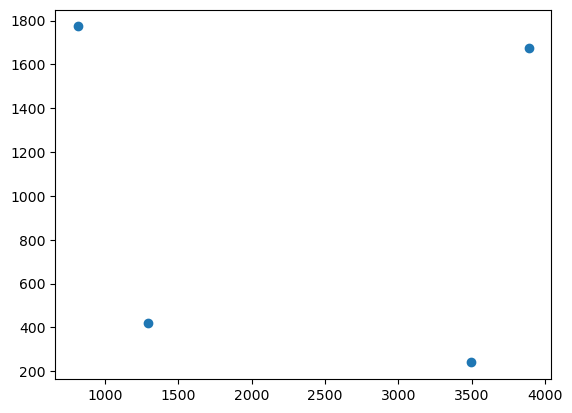

In [530]:
plt.scatter(X_all_estimated[0,:],X_all_estimated[1,:])

In [531]:
X_all

array([[3890, 3496,  813, 1294],
       [1677,  240, 1773,  420]], dtype=int32)

In [543]:
y_grid, x_grid = np.meshgrid(np.arange(H), np.arange(W))

In [544]:
x_grid.reshape(-1,)

array([  0,   0,   0, ..., 839, 839, 839])

In [545]:
y_grid.reshape(-1,)

array([   0,    1,    2, ..., 1185, 1186, 1187])

In [546]:
x_gird_plusone = np.vstack([x_grid.reshape(-1,), y_grid.reshape(-1,), np.ones((1, len(y_grid.reshape(-1,))))])

In [547]:
X_gird = M@x_gird_plusone

In [548]:
X_gird = np.floor(X_gird[0:2,:]/X_gird[2,:]).astype(int)

In [549]:
X_gird.shape

(2, 997920)

(-41.95, 880.95, -59.35, 1246.35)

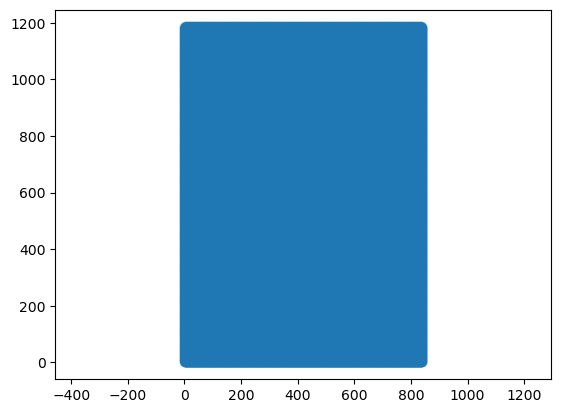

In [563]:
plt.scatter(x_grid, y_grid, alpha=0.1)
plt.axis("equal")

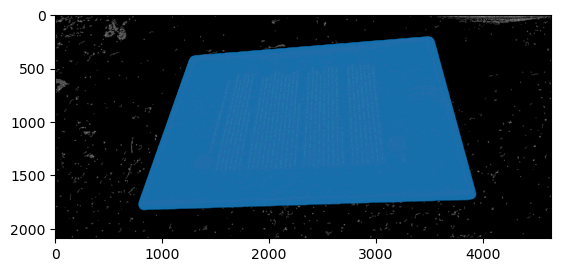

In [550]:
plt.imshow(edged, cmap="gray")
plt.scatter(X_gird[0,:], X_gird[1,:], alpha=0.1)

In [551]:
image_map = np.zeros((W, H, 3), dtype = np.uint8)

In [552]:
image_map[x_grid.reshape(-1,), y_grid.reshape(-1,)] = image[X_gird[1,:], X_gird[0,:]]

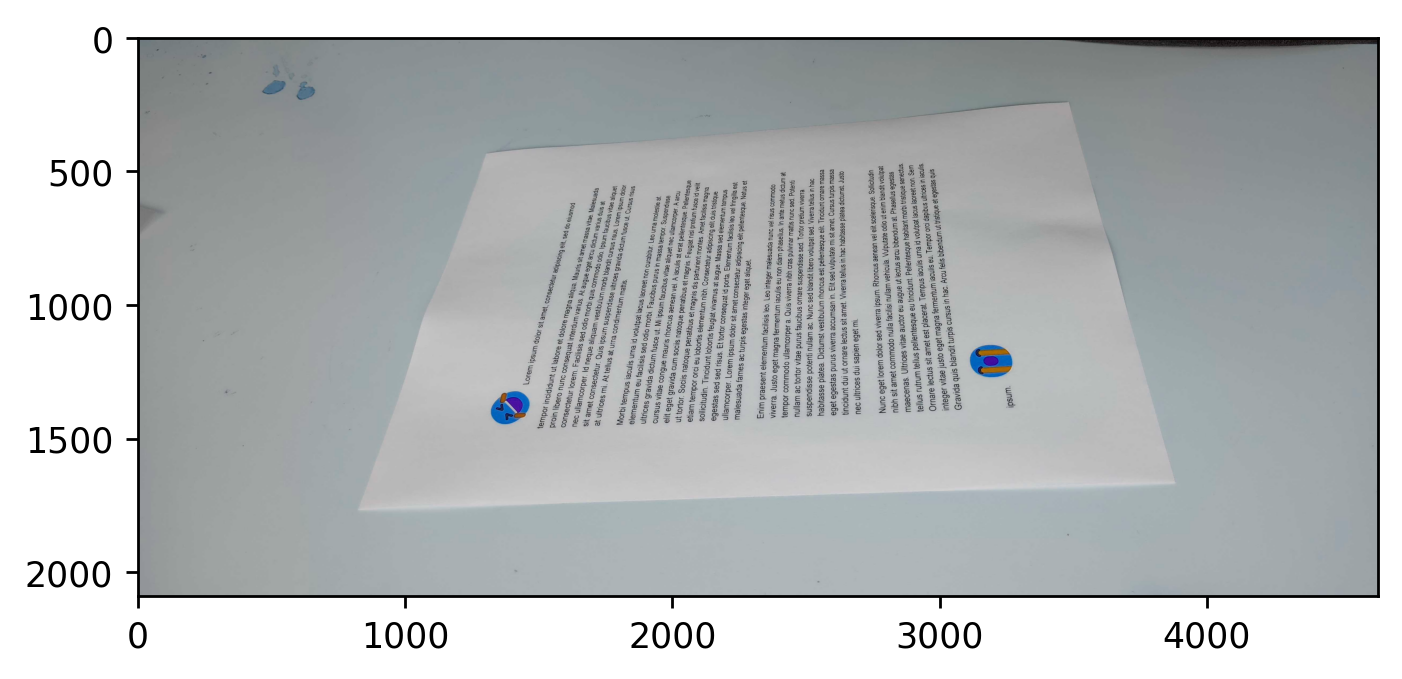

In [559]:
plt.figure(dpi=250)
plt.imshow(image)

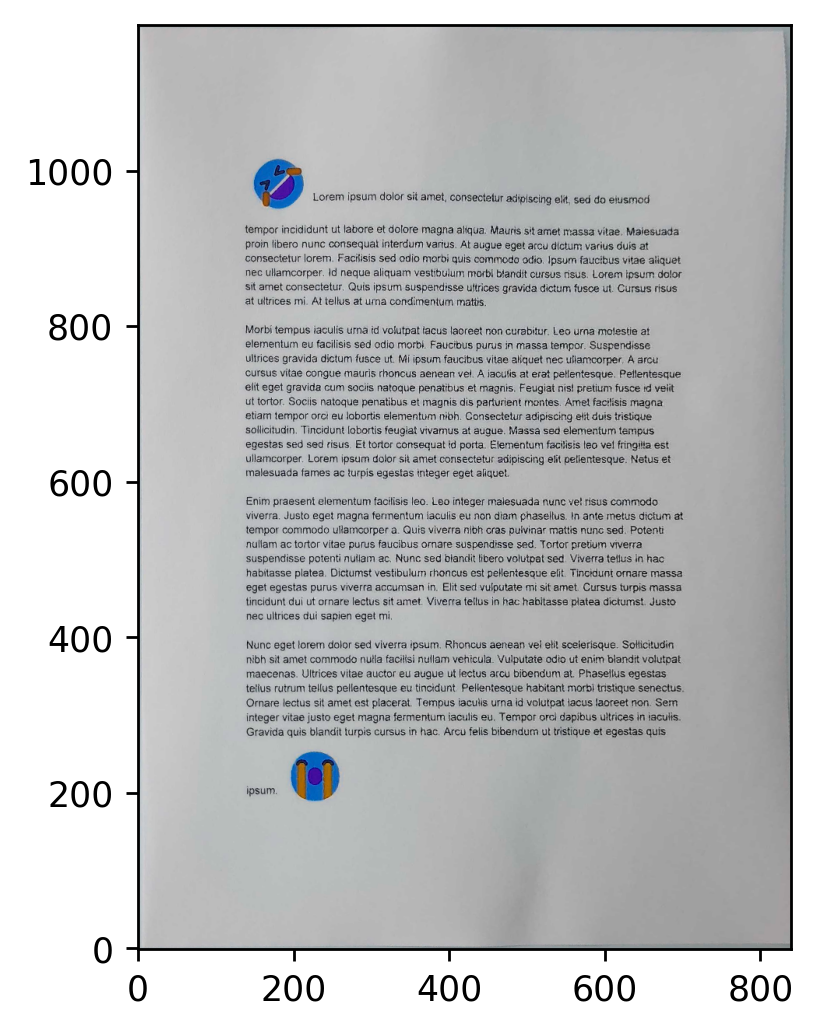

In [558]:
plt.figure(dpi=250)
plt.imshow(np.swapaxes(image_map, 0, 1), origin="lower")
